In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import keras 
import tensorflow as tf 
import matplotlib.pyplot as plt


In [3]:
#metriclerimin değişimini görmek istiyorm 
def plotData(history,metric):
  train_metrics = history.history[metric]
  validation_metrics = history.history["val_" + metric]

  epochs = range(1, len(train_metrics)+1)

  plt.plot(epochs, train_metrics)
  plt.plot(epochs, validation_metrics)

  plt.title("Training&Validation"+metric)

  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend(["train_"+metric, "val_"+metric]);

In [4]:
def plotLR(history):  # lr için de aynısını yapıyorum

  learning_rate = history.history["lr"] 

  epochs = range(1, len(learning_rate)+1) # range 0'dan başladığı için 

  plt.plot(epochs, learning_rate)
  plt.plot(epochs, validation_metrics)

  plt.title("learning_rate")

  plt.xlabel("Epochs")
  plt.ylabel("learning_rate") ;

In [5]:
from keras.datasets import mnist

(train_images, train_labels) = mnist.load_data()[0]
(test_images , test_labels) = mnist.load_data()[1]

print("shape of train images", train_images.shape)
print("shape of test images", test_images.shape)


11501568/11490434 [==============================] - 0s 0us/step
shape of train images (60000, 28, 28)
shape of test images (10000, 28, 28)


In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Dropout,Flatten, MaxPooling2D


In [7]:
input_shape = (28,28,1)

In [8]:
def mnist_model(input_shape): #modelimi tanımladım
  model = Sequential([Conv2D(28,kernel_size=(3,3),    input_shape = input_shape),
                      MaxPooling2D(pool_size = (2,2)),
                      Flatten(),
                      Dense(128, activation  = "relu"),
                      Dropout(0.2),
                      Dense(10,activation = "softmax")])



  model.compile(      optimizer = "adam",
                      loss = "sparse_categorical_crossentropy",
                      metrics = "accuracy")   


  return model                                     

In [9]:
model = mnist_model(input_shape) # model oluşturdum
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [10]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping()
history_early_stopping  =  model.fit(x = train_images,
                                     y = train_labels ,
                                     epochs = 50,
                                     validation_split = 0.20,
                                     batch_size = 64 ,
                                     verbose = 2,
                                     callbacks = [early_stopping])

Epoch 1/50
750/750 - 13s - loss: 1.0890 - accuracy: 0.8345 - val_loss: 0.2790 - val_accuracy: 0.9315 - 13s/epoch - 17ms/step
Epoch 2/50
750/750 - 4s - loss: 0.3275 - accuracy: 0.9150 - val_loss: 0.1918 - val_accuracy: 0.9508 - 4s/epoch - 6ms/step


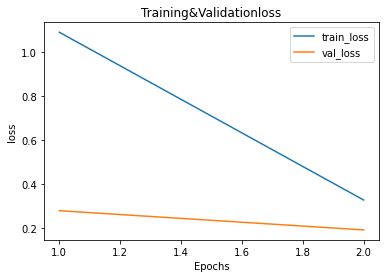

In [11]:
plotData(history_early_stopping, "loss")

In [12]:
model = mnist_model(input_shape) # model oluşturdum
early_stopping_1 = EarlyStopping(monitor = "val_accuracy",
                                 patience = 3  ,       # herhangi gelişme olmasa da model eğitime devam ediyor
                                 min_delta = 0.001,    # 0.001 den aşağısını iyileşme için kabul etme
                                 mode = "auto")        # eğrinn özellğiğine göre takip yapıyor 

early_stopping = EarlyStopping()
history_early_stopping_1  =  model.fit(x = train_images,
                                     y = train_labels ,
                                     epochs = 50,
                                     validation_split = 0.20,
                                     batch_size = 64 ,
                                     verbose = 2,
                                     callbacks = [early_stopping_1]) 



Epoch 1/50
750/750 - 4s - loss: 1.0602 - accuracy: 0.8328 - val_loss: 0.2488 - val_accuracy: 0.9376 - 4s/epoch - 6ms/step
Epoch 2/50
750/750 - 5s - loss: 0.3043 - accuracy: 0.9180 - val_loss: 0.1770 - val_accuracy: 0.9548 - 5s/epoch - 6ms/step
Epoch 3/50
750/750 - 5s - loss: 0.2097 - accuracy: 0.9405 - val_loss: 0.1761 - val_accuracy: 0.9592 - 5s/epoch - 7ms/step
Epoch 4/50
750/750 - 4s - loss: 0.1670 - accuracy: 0.9515 - val_loss: 0.1470 - val_accuracy: 0.9652 - 4s/epoch - 5ms/step
Epoch 5/50
750/750 - 4s - loss: 0.1433 - accuracy: 0.9589 - val_loss: 0.1343 - val_accuracy: 0.9682 - 4s/epoch - 5ms/step
Epoch 6/50
750/750 - 4s - loss: 0.1246 - accuracy: 0.9635 - val_loss: 0.1293 - val_accuracy: 0.9713 - 4s/epoch - 5ms/step
Epoch 7/50
750/750 - 3s - loss: 0.1213 - accuracy: 0.9657 - val_loss: 0.1189 - val_accuracy: 0.9712 - 3s/epoch - 5ms/step
Epoch 8/50
750/750 - 4s - loss: 0.1160 - accuracy: 0.9678 - val_loss: 0.1183 - val_accuracy: 0.9729 - 4s/epoch - 5ms/step
Epoch 9/50
750/750 - 4s 

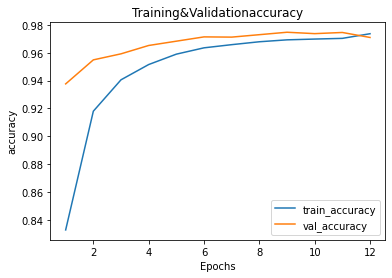

In [13]:
plotData(history_early_stopping_1, "accuracy")

## CSV Logger

Eğitim esnasında her adım sonunda, hem eğitim hem test verisi için, hata değeri — loss — başarım değeri — acc — ve öğrenme hızı — learning rate — değerlerini kaydeder.

In [14]:
from keras.callbacks import CSVLogger   # elde ettiğim değerleri tek tek kaydediyor

csv = CSVLogger("/content/drive/MyDrive/csv/sonuc.csv")

model = mnist_model(input_shape)

history_csv_logger  =  model.fit(      x = train_images,
                                       y = train_labels ,
                                       epochs = 20,
                                       validation_split = 0.20,
                                       batch_size = 64 ,
                                       verbose = 2,
                                       callbacks = [csv]) 

Epoch 1/20
750/750 - 5s - loss: 1.1509 - accuracy: 0.8300 - val_loss: 0.2946 - val_accuracy: 0.9329 - 5s/epoch - 7ms/step
Epoch 2/20
750/750 - 4s - loss: 0.3329 - accuracy: 0.9147 - val_loss: 0.1713 - val_accuracy: 0.9578 - 4s/epoch - 5ms/step
Epoch 3/20
750/750 - 4s - loss: 0.2222 - accuracy: 0.9389 - val_loss: 0.1687 - val_accuracy: 0.9611 - 4s/epoch - 5ms/step
Epoch 4/20
750/750 - 4s - loss: 0.1794 - accuracy: 0.9496 - val_loss: 0.1484 - val_accuracy: 0.9613 - 4s/epoch - 5ms/step
Epoch 5/20
750/750 - 5s - loss: 0.1548 - accuracy: 0.9569 - val_loss: 0.1361 - val_accuracy: 0.9676 - 5s/epoch - 6ms/step
Epoch 6/20
750/750 - 4s - loss: 0.1408 - accuracy: 0.9602 - val_loss: 0.1318 - val_accuracy: 0.9711 - 4s/epoch - 5ms/step
Epoch 7/20
750/750 - 4s - loss: 0.1319 - accuracy: 0.9625 - val_loss: 0.1185 - val_accuracy: 0.9728 - 4s/epoch - 5ms/step
Epoch 8/20
750/750 - 3s - loss: 0.1161 - accuracy: 0.9660 - val_loss: 0.1228 - val_accuracy: 0.9685 - 3s/epoch - 5ms/step
Epoch 9/20
750/750 - 3s 

In [15]:
import pandas as pd 

In [16]:
pd.read_csv("/content/drive/MyDrive/csv/sonuc.csv")

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.829958,1.150873,0.932917,0.294555
1,1,0.914667,0.332923,0.957833,0.171281
2,2,0.938875,0.222167,0.961083,0.168741
3,3,0.949604,0.179403,0.961333,0.148377
4,4,0.956896,0.154753,0.967583,0.136074
5,5,0.960187,0.140768,0.971083,0.131788
6,6,0.962521,0.131923,0.972750,0.118523
7,7,0.965979,0.116077,0.968500,0.122758
8,8,0.967687,0.112435,0.967500,0.164255
9,9,0.971479,0.105611,0.970333,0.126254


#**ModelCheckpoint**

In [17]:
# eğitim istemediğim bir şekilde kesilirse  ya da iyi bir score alırsak belirli aralıklarla(epoch) kaydetmeye yarıyor 

from keras.callbacks import ModelCheckpoint

Eğitim esnasında her adım sonunda belirleyeceğiniz şartlara göre modelin komple yada sadece ağırlıklarının kaydedilmesi işini yapar.  

In [ ]:
path = "/content/drive/MyDrive/csv"
checkpoint  = ModelCheckpoint(filepath = path , 
                              save_freq = "epoch",
                              save_weights_only= True , # en iyi değerleri kaydediyor
                              verbose = 1                  
                              )

model = mnist_model(input_shape)

history_checkpoint =  model.fit(      x = train_images,
                                       y = train_labels ,
                                       epochs = 20,
                                       validation_split = 0.20,
                                       batch_size = 64 ,
                                       verbose = 2,
                                       callbacks = [checkpoint]) 

# **ReduceLROnPlateu**

In [20]:
from keras.callbacks import ReduceLROnPlateau

Eğitim esnasında takip ettiğiniz değerde belirleyeceğiniz adım — epoch — boyunca iyileşme yoksa Öğrenme hızını sizin belirleyeceğiniz bir katsayıyla çarparak küçültüyor.

In [24]:
 
reduce_lr = ReduceLROnPlateau(monitor = "val_loss",
                             factor= 0.2,
                             patience = 0,
                             verbose = 2 
                             )

model = mnist_model(input_shape)

history_reduce_lr =  model.fit(        x = train_images,
                                       y = train_labels ,
                                       epochs = 20,
                                       validation_split = 0.20,
                                       batch_size = 64 ,
                                       verbose = 2,
                                       callbacks = [reduce_lr]) 


Epoch 1/20
750/750 - 4s - loss: 1.0434 - accuracy: 0.8229 - val_loss: 0.2694 - val_accuracy: 0.9337 - lr: 0.0010 - 4s/epoch - 6ms/step
Epoch 2/20
750/750 - 3s - loss: 0.3099 - accuracy: 0.9159 - val_loss: 0.1836 - val_accuracy: 0.9533 - lr: 0.0010 - 3s/epoch - 5ms/step
Epoch 3/20
750/750 - 3s - loss: 0.2163 - accuracy: 0.9380 - val_loss: 0.1690 - val_accuracy: 0.9561 - lr: 0.0010 - 3s/epoch - 5ms/step
Epoch 4/20
750/750 - 3s - loss: 0.1689 - accuracy: 0.9505 - val_loss: 0.1370 - val_accuracy: 0.9702 - lr: 0.0010 - 3s/epoch - 5ms/step
Epoch 5/20
750/750 - 3s - loss: 0.1487 - accuracy: 0.9582 - val_loss: 0.1322 - val_accuracy: 0.9702 - lr: 0.0010 - 3s/epoch - 5ms/step
Epoch 6/20
750/750 - 4s - loss: 0.1294 - accuracy: 0.9628 - val_loss: 0.1288 - val_accuracy: 0.9691 - lr: 0.0010 - 4s/epoch - 5ms/step
Epoch 7/20

Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
750/750 - 3s - loss: 0.1207 - accuracy: 0.9655 - val_loss: 0.1324 - val_accuracy: 0.9695 - lr: 0.

NameError: ignored

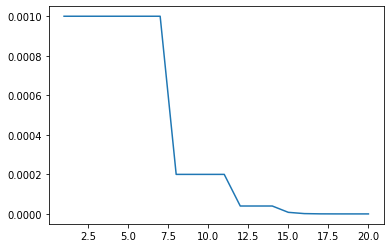

In [25]:
plotLR(history_reduce_lr)

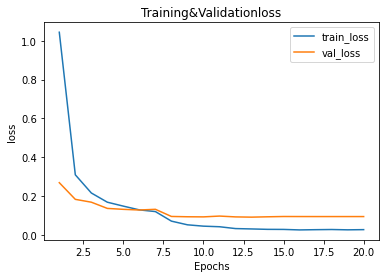

In [26]:
plotData(history_reduce_lr, "loss")

# T**ensorBoard**

TensorBoard sayesinde kara kutu gibi çalışan yapay sinir ağları içerisindeki hesaplama aşamalarının içerisine bir ışık tutmuş oluyoruz. Grafiksel ekranda accuracy, loss gibi değişkenlerin iterasyonlar boyunca değişimini canlı olarak web arayüzünden izleyerek programın istenildiği gibi davranıp davranmadığını gözlemleyebiliyoruz.

In [29]:
from keras.callbacks import TensorBoard
import time 
# 

Logları alırken bir zaman parametresi de alıyoruz ki program her çalıştığında hangi tarih ve saatte oluşturduysak klasörün ismini o tarih olarak kaydederek kolaylık sağlasın.

In [ ]:
time = time.strftime("%Y_%m_%d_%H_%M_%S")
tensorboard = TensorBoard(log_dir  = "/content/drive/MyDrive/csv{}".format(time), # belirtilen yola aralıklarla kayıt edecek
                          batch_size  =  64 ,
                          histogram_freq  =  1) 

model = mnist_model(input_shape)

history_reduce_lr =  model.fit(        x = train_images,
                                       y = train_labels ,
                                       epochs = 20,
                                       validation_split = 0.20,
                                       batch_size = 64 ,
                                       verbose = 2,
                                       callbacks = [tensorboard]) 


In [35]:
print(tensorboard.log_dir) # bu adres ile tensorboarda bağlanabilirim 

/content/drive/MyDrive/csv2022_01_27_14_13_29


In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs